<a href="https://colab.research.google.com/github/ThousandAI/pycs4001/blob/main/class08/hw5_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **hw5 solution**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **讀取資料**

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class06/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
from sklearn.model_selection import train_test_split
X = np.array(data["YearsExperience"]).reshape(-1,1)
Y = np.array(data["Salary"]).reshape(-1,1)
train_x, test_x, train_y, test_y  = train_test_split(X, Y, test_size=0.2, random_state=10)

## **標準化數據**

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

sc_train_x = scaler_x.fit_transform(train_x)
sc_train_y = scaler_y.fit_transform(train_y)

## **搭建模型**

In [5]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

## **訓練模型**

In [6]:
regression.fit(sc_train_x, sc_train_y)

LinearRegression()

## **評估模型**

In [7]:
from sklearn.metrics import mean_squared_error
sc_test_x = scaler_x.transform(test_x)
sc_test_y = scaler_y.transform(test_y)
y_hat = regression.predict(sc_test_x)
print(f"evaluation MSE: {mean_squared_error(sc_test_y, y_hat)}")

evaluation MSE: 0.013446201443205819


## **畫圖**

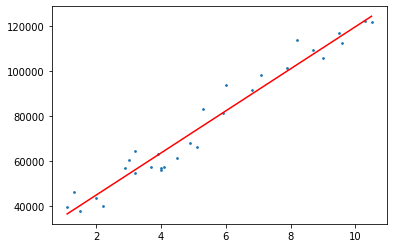

In [8]:
Y_hat = regression.predict(scaler_x.transform(X))
Y_inv_hat = scaler_y.inverse_transform(Y_hat)
plt.scatter(X, Y, s =3)
plt.plot(X, Y_inv_hat, color="red")
plt.show()